## Dengue Fever prediction 

A spare-time fun project to predict infection cases of dengue fever in Iquito and San Jose. The data was obtained via a Driven Data challenge, [DengAI](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from dateutil.parse import parser
from datetime import datetime

%matplotlib inline 

print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)

numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2
seaborn 0.8.0


In [56]:
df_train = pd.read_csv('Data/dengue_features_train.csv')
df_test = pd.read_csv('Data/dengue_features_test.csv')
df_labels = pd.read_csv('Data/dengue_labels_train.csv')
df_result = pd.read_csv('Data/submission_format.csv')

In [57]:
# df_train.columns
# df_labels.columns

In [58]:
df_labels.head()
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Create new **merged data frame** to combine train data and labels. 

In [59]:
# To facilitate the merge, homogenize the index between the tables to be merged:

df_train = df_train.set_index(['city', 'year', 'weekofyear'])
df_labels = df_labels.set_index(['city', 'year', 'weekofyear'])

df = pd.merge(df_train, df_labels, right_index = True, left_index = True, how = 'outer') 

In [60]:
df.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k     ...       \
city year weekofyear                                ...        
sj   1990 18                              299.8     ...        
          19                              300.9     ...        
          20                              300.5     ...        
          21                              301.4     ...        
          22                              301.9     ...        

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22                   3.014286           28.942857   

                      station_diur_temp_rng_c  station_max_temp_c  \
city year weekofyear                                                
sj   1990 18                         6.900000                29.4   
          19                         6.371429                31.7   
          20        

## 1. Understanding the response variable:

### 1.1. Timeline of infection cases in San Jose and in Iquitos (line plots)

For ease of x-axis plotting, first parse week_start_date from string to datetime:

In [88]:
df['datetime'] = df['week_start_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# test: check data type:
# print(df[['week_start_date', 'datetime']].dtypes)

# test: inspect equality:
# df[['week_start_date', 'datetime']]

In [101]:
# Split dataframe into SJ and Iq parts for more compact code in plotting:

df_sj = df.loc['sj']
df_iq = df.loc['iq']

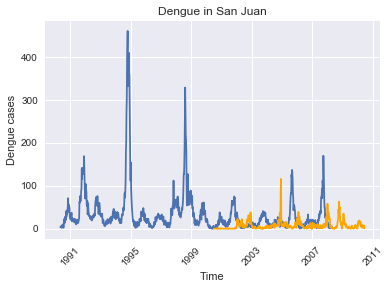

In [102]:
plt.rcParams.update({'font.size': 16})

plt.plot(df_sj['datetime'], df_sj['total_cases'])
plt.title('Dengue in San Juan')
plt.ylabel('Dengue cases')
plt.xlabel('Time')
plt.xticks(rotation=45)

# to overlay Iquitos data: 
plt.plot(df_iq['datetime'], df_iq['total_cases'], color = 'orange')

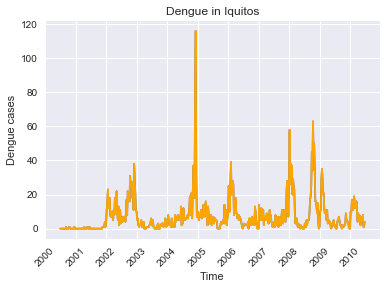

In [103]:
plt.plot(df_iq['datetime'], df_iq['total_cases'])
plt.title('Dengue in Iquitos')
plt.ylabel('Dengue cases')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.plot(df_iq['datetime'], df_iq['total_cases'], color = 'orange')

### 1.2. Plot distribution of total cases by week (for San Jose, for Iquitos)

In [119]:
df_iq.reset_index(inplace = True)
df_sj.reset_index(inplace = True)

ValueError: cannot insert level_0, already exists

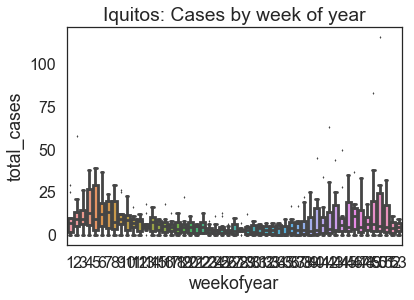

In [151]:
sns.set_context(context = 'poster', font_scale=1.0)
sns.set_style('white')

ax = sns.boxplot(x = 'weekofyear', y = 'total_cases', data = df_iq, fliersize = 2)
ax.set_title('Iquitos: Cases by week of year')

# FIXME: silly x-axis ticks 

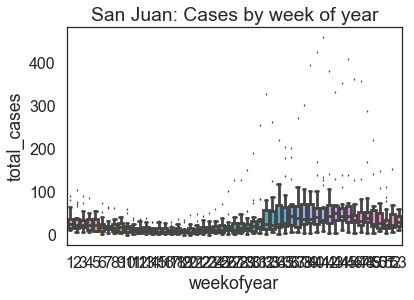

In [152]:
ax2 = sns.boxplot(x = 'weekofyear', y = 'total_cases', data = df_sj, fliersize = 2)
ax2.set_title('San Juan: Cases by week of year')

# FIXME: silly x-axis ticks 

In [ ]:
# 3. Check correlation with all other weather/vegetation variables

In [17]:
df_corr = df.corr(method = 'pearson'); df_corr
df_corr.loc['total_cases']

ndvi_ne                                 -0.244080
ndvi_nw                                 -0.210402
ndvi_se                                 -0.184491
ndvi_sw                                 -0.210784
precipitation_amt_mm                    -0.037906
reanalysis_air_temp_k                    0.335022
reanalysis_avg_temp_k                    0.192120
reanalysis_dew_point_temp_k              0.179881
reanalysis_max_air_temp_k               -0.240128
reanalysis_min_air_temp_k                0.403926
reanalysis_precip_amt_kg_per_m2         -0.016050
reanalysis_relative_humidity_percent    -0.168434
reanalysis_sat_precip_amt_mm            -0.037906
reanalysis_specific_humidity_g_per_kg    0.165277
reanalysis_tdtr_k                       -0.342131
station_avg_temp_c                       0.119310
station_diur_temp_rng_c                 -0.310034
station_max_temp_c                      -0.107196
station_min_temp_c                       0.328417
station_precip_mm                       -0.098085


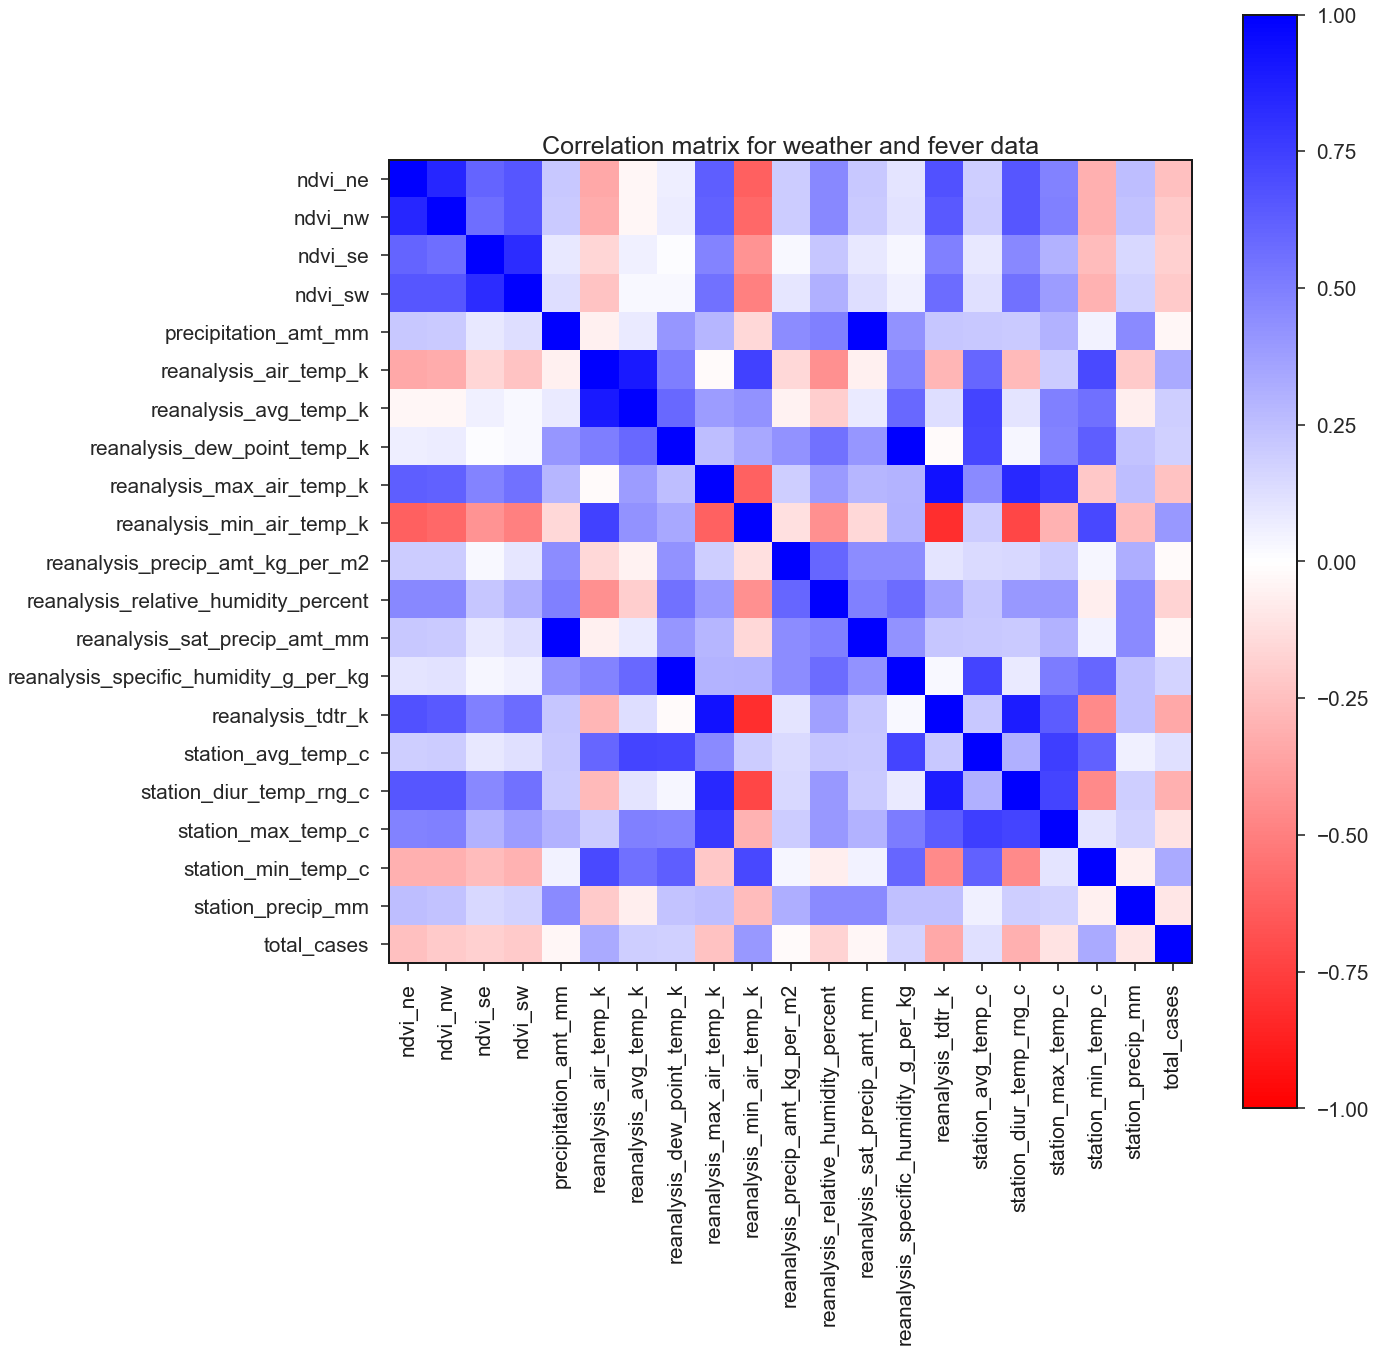

In [18]:
#Temporary aestetics for correlation matrix
sns.set_context(context = 'poster', font_scale=1.3)
params = {'xtick.direction': 'in',
                'xtick.major.size': 8,
                'xtick.minor.size': 5,
                'xtick.color': '0.1',
                'ytick.direction': 'in',
                'ytick.major.size': 8,
                'ytick.minor.size': 5,
                'ytick.color': '0.15',
                'axes.linewidth': 2.0,
                'axes.edgecolor': '0.1',
                'grid.color': '.9',
               }
sns.set_style("white", params)

temp_params = {'xtick.direction': 'out',
                'xtick.major.size': 8,
                'xtick.minor.size': 5,
                'xtick.color': '0.1',
                'ytick.direction': 'out',
                'ytick.major.size': 8,
                'ytick.minor.size': 5,
                'ytick.color': '0.15',
                'axes.linewidth': 2.0,
                'axes.edgecolor': '0.1',
                'grid.color': '.9'}
               
sns.set_style("white", temp_params)

plt.figure(figsize = (20,20));

plt.imshow(df_corr, cmap=plt.cm.bwr_r, vmin = -1, vmax = 1)

tick_marks = list(range(len(df_corr.columns)))
plt.xticks(tick_marks, df_corr.columns, rotation=90)
plt.yticks(tick_marks, df_corr.columns)
plt.colorbar()

plt.title('Correlation matrix for weather and fever data')
plt.tight_layout()

sns.set_style("white", params)bb

In [ ]:
### TODO: 
# Generate XY scatter plots of total cases vs every variable in the dataset 
# (separately for San Jose and Iquitos))

## 2. Predictive models blind to time-series information:

First of all, let's see if weather data in a current week *on its own* is sufficient to predict infection cases in that week, as this would make it a more straightforward model. It's a long stretch, but it's a quick check and potentially worth trying for the insight

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

def calculate_rms(pred, y_val):
    rms = np.sqrt(sum((pred - pd.to_numeric(y_val))** 2)/len(y_val))
    return rms

In [153]:
# Binarise city information for the use of models: 

df = df.reset_index()
df['city_sj'] = df['city'].apply(lambda x: 1 if x == 'sj' else 0)
df = df.set_index(['city', 'year', 'weekofyear'])

In [21]:
# Example single-feature linear model:

X = np.array(df['station_diur_temp_rng_c'])
y = np.array(df['total_cases'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

lm_onefeature = LinearRegression().fit(X = X_train.reshape(-1,1), y = y_train)
y_pred = lm_onefeature.predict(X_test.reshape(-1,1))

# Evaluate the single-feature model:

mean_y = np.mean(y_train)
pred_naive = np.zeros_like(y_test, dtype = float)
pred_naive += mean_y; pred_naive

print('RMSE: Naive', calculate_rms(pred_naive, y_test))
print('RMSE: Model', calculate_rms(y_pred, y_test))

RMSE: Naive 21.7262176766
RMSE: Model 20.5893696055


Barely any improvement at all over naive model! Try feeding all the features:

In [22]:
# Multi-feature linear model:

X = np.array(df.drop(['total_cases'], axis = 1))
y = np.array(df['total_cases'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

lm_multifeature = LinearRegression().fit(X = X_train, y = y_train)
y_pred = lm_multifeature.predict(X_test)

# Evaluate the multi-feature model:

mean_y = np.mean(y_train); print(mean_y)
pred_naive = np.zeros_like(y_test, dtype = float); pred_naive
pred_naive += mean_y; pred_naive

print('RMSE: Naive', calculate_rms(pred_naive, y_test))
print('RMSE: Model', calculate_rms(y_pred, y_test))

21.2241918665
RMSE: Naive 29.2532190847
RMSE: Model 25.6791775065


A gentle improvement over a completely naive model. Visualise its predictive performance:

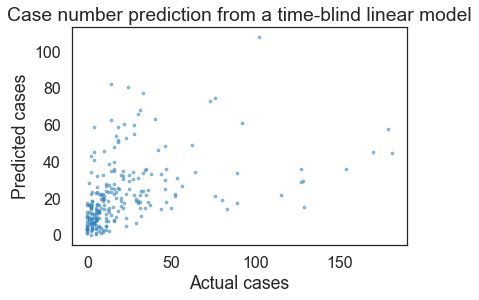

In [155]:
ax1 = plt.subplot(1,1,1)

ax1.scatter(y_test, y_pred, 
            label = '', 
            s= 40, color = '#3182bd', alpha = 0.55, marker='.')
    
ax1.set_xlabel('Actual cases')
ax1.set_ylabel('Predicted cases')  
    
ax1.set_title('Case number prediction from a time-blind linear model')

In [24]:
# Random forest regressor:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

rf_model = RandomForestRegressor().fit(X = X_train, y = y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the multi-feature model:

mean_y = np.mean(y_train)
pred_naive = np.zeros_like(y_test, dtype = float)
pred_naive += mean_y

print('RMSE: Naive', calculate_rms(pred_naive, y_test))
print('RMSE: Model', calculate_rms(y_pred, y_test))

RMSE: Naive 31.3038867339
RMSE: Model 28.6398811392


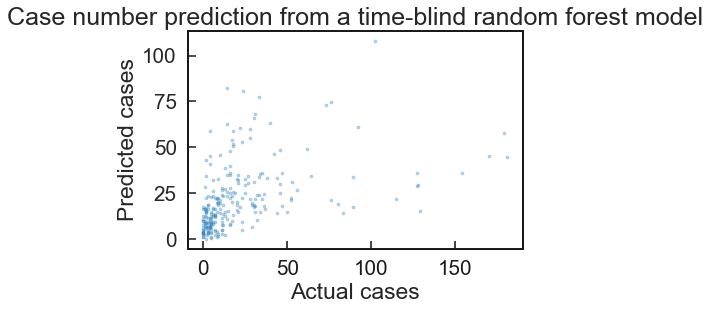

In [25]:
# Visualising predictions

ax1 = plt.subplot(1,1,1)

ax1.scatter(y_test, y_pred, 
            label = '', 
            s= 40, color = '#3182bd', alpha = 0.35, marker='.')
    
ax1.set_xlabel('Actual cases')
ax1.set_ylabel('Predicted cases')  
    
ax1.set_title('Case number prediction from a time-blind random forest model')

Performance appears to depend strongly on sample distrbution (if rerunning the above code several times with resampling the test/train split). Check distribution:

(-10, 150)

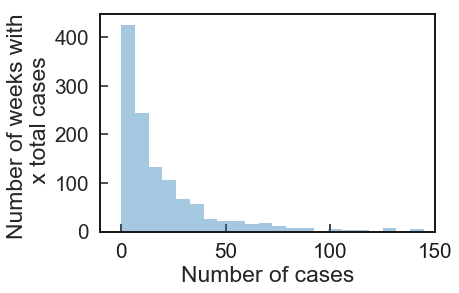

In [26]:
ax2 = sns.distplot(df['total_cases'], kde = False)
ax2.set_ylabel('Number of weeks with \n x total cases')
ax2.set_xlabel('Number of cases')
ax2.set_xlim(-10,150)

## Conclusions so far: 

Weather and vegetation conditions at current time (on their own) are not on their own sufficient to predict the number of infection cases, using random forest regressor or a linear model.

## Next steps:



- Using time series processing functions to test how the predictive power of simple weather models changes upon applying varying levels of time-shift (disease incubation time + delay in reporting to doctors?), as well as rolling mean and rolling sum



- Move from simple supervised learning models to dedicated time-series prediction models
